In [1]:
### Importing packages

!pip install --upgrade pip
!pip install --upgrade Pillow
!pip install wordcloud

!pip install --q nltk
!pip install --q squarify
#!pip install --q spacy
#!pip install --q textstat


import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

import numpy as np
import pandas as pd  
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import re
import os
import time
from PIL import Image
import io
import requests

import squarify
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
import string

%matplotlib inline
pd.options.display.max_colwidth = 1000 #to print complete verses

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rhodadurodola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rhodadurodola/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rhodadurodola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rhodadurodola/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2023-10-12 00:50:39.232960: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Data Pre-processing

In [2]:
### Reading data file
data = pd.read_excel("//Users/rhodadurodola/Desktop/Project/Data/data.xlsx", index_col=0)

In [3]:
### Cleaning data

# Define the additional stopwords
extra_stopwords = ["thy", "thou", "thee", "hath", "upon", "thine", "me", "him", "them", "shall", "ye", "one", "unto", "us", "And", "also", "but"]
# Combining NLTK stopwords with extra stopwords defined
stop_words = set(stopwords.words('english') + extra_stopwords)

lemmatizer = WordNetLemmatizer()

# Function to process text
def process_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]

    #Remove any characters that are not alphabets
    words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]
    
    # Remove stopwords, lemmatize
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a sentence
    processed_text = ' '.join(filtered_words)
    
    return processed_text

# Apply function to 'text' column
data['Processed_Text'] = data['Text'].apply(process_text)

print(data.head())

         Book Name  Book Number  Chapter  Verse  \
Verse ID                                          
0          Matthew            1        1      1   
1          Matthew            1        1      2   
2          Matthew            1        1      3   
3          Matthew            1        1      4   
4          Matthew            1        1      5   

                                                                                              Text  \
Verse ID                                                                                             
0                The book of the generation of Jesus Christ, the son of David, the son of Abraham.   
1              Abraham begat Isaac; and Isaac begat Jacob; and Jacob begat Judas and his brethren;   
2         And Judas begat Phares and Zara of Thamar; and Phares begat Esrom; and Esrom begat Aram;   
3                   And Aram begat Aminadab; and Aminadab begat Naasson; and Naasson begat Salmon;   
4              And Salmon bega

In [4]:
# Create a new "Reference" column 
data['Reference'] = data['Book Name'] + ' ' + data['Chapter'].astype(str) + ':' + data['Verse'].astype(str)

In [5]:
###  Separating the chapters 

## Book of Matthew
matt = data[data['Book Number'].isin([1])]
#print(matt.head())

## Book of Mark
mark = data[data['Book Number'].isin([2])]
#print(mark.head())

## Book of Luke
luke = data[data['Book Number'].isin([3])]
#print(luke.head())

## Book of John
john = data[data['Book Number'].isin([4])]
#print(john.head())

# EDA

In [6]:
# Summary
print(data.describe())

# Data types
print("\nData types of each column:")
print(data.dtypes)


# Number of rows and columns
print("\nNumber of rows and columns:")
print(data.shape)

# Check for missing values
print("\nMissing values in the DataFrame:")
print(data.isnull().sum())

       Book Number      Chapter        Verse
count  3779.000000  3779.000000  3779.000000
mean      2.486372    12.148981    23.724001
std       1.132331     7.216407    15.511733
min       1.000000     1.000000     1.000000
25%       1.000000     6.000000    11.000000
50%       3.000000    11.000000    22.000000
75%       3.000000    18.000000    34.000000
max       4.000000    28.000000    80.000000

Data types of each column:
Book Name         object
Book Number        int64
Chapter            int64
Verse              int64
Text              object
Processed_Text    object
Reference         object
dtype: object

Number of rows and columns:
(3779, 7)

Missing values in the DataFrame:
Book Name         0
Book Number       0
Chapter           0
Verse             0
Text              0
Processed_Text    0
Reference         0
dtype: int64


In [7]:
# Longest book by number of chapters

# Group the data by 'Book Name' and 'Chapter' and count the verses in each chapter
chapter_counts = data.groupby(['Book Name', 'Chapter'])['Verse'].count()
# Find the maximum number of chapters in a book
max_chapters_per_book = chapter_counts.groupby('Book Name').count()
# Find the book with the maximum number of chapters
max_chapters_book = max_chapters_per_book.idxmax()
max_chapters = max_chapters_per_book.max()

print(f"The longest book is '{max_chapters_book}' with {max_chapters} chapters.")

# Group the data by 'Chapter' and count the verses in each chapter
chapter_counts = matt.groupby('Chapter')['Verse'].count()
# Find the chapter with the maximum number of verses
max_verses_chapter = chapter_counts.idxmax()
max_verses = chapter_counts[max_verses_chapter]
print(f"The longest chapter in the Book of Matthew is Chapter {max_verses_chapter} with {max_verses} verses.")

# Find the chapter with the maximum number of verses
min_verses_chapter = chapter_counts.idxmin()
min_verses = chapter_counts[min_verses_chapter]
print(f"The shortest chapter in the Book of Matthew is Chapter {min_verses_chapter} with {min_verses} verses.\n")

####################################################

# Shortest book by number of chapters
min_chapters_book = max_chapters_per_book.idxmin()
min_chapters = max_chapters_per_book.min()

print(f"The shortest book is '{min_chapters_book}' with {min_chapters} chapters.")

chapter_counts_mk = mark.groupby('Chapter')['Verse'].count()
########################
max_verses_chapter_mk = chapter_counts_mk.idxmax()
max_verses_mk = chapter_counts_mk[max_verses_chapter_mk]
print(f"The longest chapter in the Book of Mark is Chapter {max_verses_chapter_mk} with {max_verses_mk} verses.")
########################
min_verses_chapter_mk = chapter_counts_mk.idxmin()
min_verses_mk = chapter_counts_mk[min_verses_chapter_mk]
print(f"The shortest chapter in the Book of Mark is Chapter {min_verses_chapter_mk} with {min_verses_mk} verses.\n")


# Luke
l_chapters = luke['Chapter'].max()
print(f"The book of Luke has {l_chapters} chapters.")

chapter_counts_l = luke.groupby('Chapter')['Verse'].count()
max_verses_chapter_l = chapter_counts_l.idxmax()
max_verses_l = chapter_counts_l[max_verses_chapter_l]
print(f"The longest chapter in the Book of Luke is Chapter {max_verses_chapter_l} with {max_verses_l} verses.")

min_verses_chapter_l = chapter_counts_l.idxmin()
min_verses_l = chapter_counts_l[min_verses_chapter_mk]
print(f"The shortest chapter in the Book of Luke is Chapter {min_verses_chapter_l} with {min_verses_l} verses.\n")


# John
j_chapters = john['Chapter'].max()
print(f"The book of John has {j_chapters} chapters.")

chapter_counts_j = john.groupby('Chapter')['Verse'].count()
max_verses_chapter_j = chapter_counts_j.idxmax()
max_verses_j = chapter_counts_j[max_verses_chapter_j]
print(f"The longest chapter in the Book of John is Chapter {max_verses_chapter_j} with {max_verses_j} verses.")

min_verses_chapter_j = chapter_counts_j.idxmin()
min_verses_j = chapter_counts_j[min_verses_chapter_j]
print(f"The shortest chapter in the Book of John is Chapter {min_verses_chapter_j} with {min_verses_j} verses.")



The longest book is 'Matthew' with 28 chapters.
The longest chapter in the Book of Matthew is Chapter 26 with 75 verses.
The shortest chapter in the Book of Matthew is Chapter 3 with 17 verses.

The shortest book is 'Mark' with 16 chapters.
The longest chapter in the Book of Mark is Chapter 14 with 72 verses.
The shortest chapter in the Book of Mark is Chapter 16 with 20 verses.

The book of Luke has 24 chapters.
The longest chapter in the Book of Luke is Chapter 1 with 80 verses.
The shortest chapter in the Book of Luke is Chapter 16 with 31 verses.

The book of John has 21 chapters.
The longest chapter in the Book of John is Chapter 6 with 71 verses.
The shortest chapter in the Book of John is Chapter 2 with 25 verses.


In [8]:
# Mean, median, and standard deviation of word count per chapter in each book

# Empty list to store the DataFrames for each book
book_stats_list = []

# Iterate through each book
for book in data['Book Name'].unique():
    # Filter data for the current book
    book_data = data[data['Book Name'] == book]
    
    # Group data by 'Chapter' and calculate word count statistics
    chapter_counts = book_data.groupby('Chapter')['Processed_Text'].apply(lambda x: x.str.split().apply(len).mean())
    chapter_medians = book_data.groupby('Chapter')['Processed_Text'].apply(lambda x: x.str.split().apply(len).median())
    chapter_std = book_data.groupby('Chapter')['Processed_Text'].apply(lambda x: x.str.split().apply(len).std())
    
    # Create a DataFrame for the statistics of the current book
    book_stats = pd.DataFrame({
        'Book Name': book,
        'Chapter': chapter_counts.index,
        'Mean Word Count': chapter_counts.values,
        'Median Word Count': chapter_medians.values,
        'Std Word Count': chapter_std.values
    })
    
    # Append the book's statistics DataFrame to the list
    book_stats_list.append(book_stats)

# Concatenate all book statistics DataFrames into one
chapter_stats = pd.concat(book_stats_list, ignore_index=True)

# Print the first few rows of the chapter_stats DataFrame
print(chapter_stats.head())


  Book Name  Chapter  Mean Word Count  Median Word Count  Std Word Count
0   Matthew        1        10.080000                9.0        2.644491
1   Matthew        2        11.521739               11.0        4.813519
2   Matthew        3         9.529412                9.0        3.743622
3   Matthew        4         9.560000                9.0        3.969467
4   Matthew        5         8.687500                8.0        3.765217


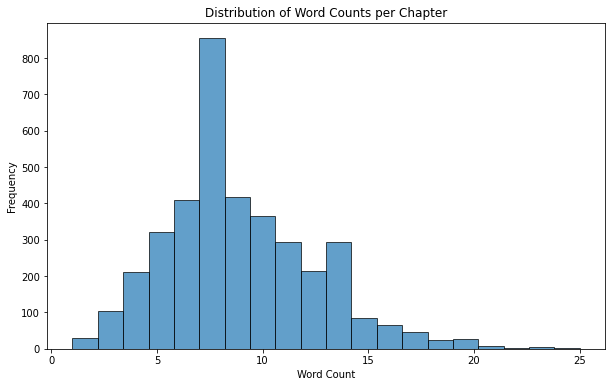

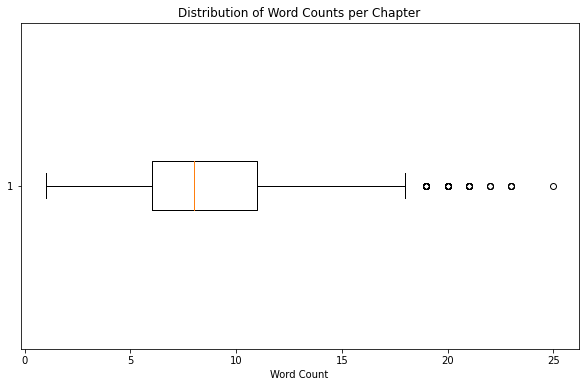

In [9]:
# Visualise the distribution of word counts

data['Word_Count'] = data['Processed_Text'].str.split().apply(len)

# Create a histogram to visualize the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(data['Word_Count'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Word Counts per Chapter')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
#plt.grid(axis='y', alpha=0.7)
plt.show()

# Create a box plot to visualize the distribution of word counts
plt.figure(figsize=(10, 6))
plt.boxplot(data['Word_Count'], vert=False)
plt.title('Distribution of Word Counts per Chapter')
plt.xlabel('Word Count')
#plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

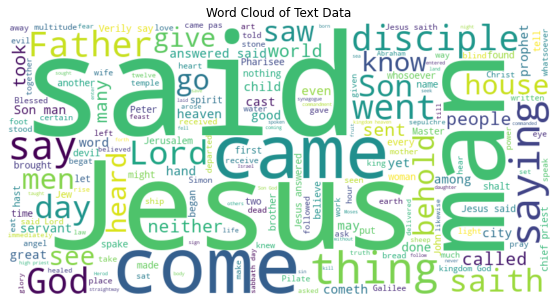

In [10]:
## Plotting a word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Processed_Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Text Data")
plt.show()

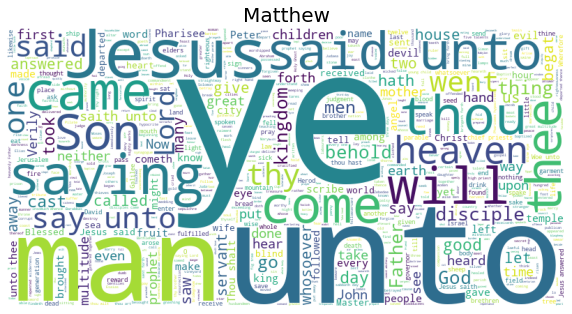

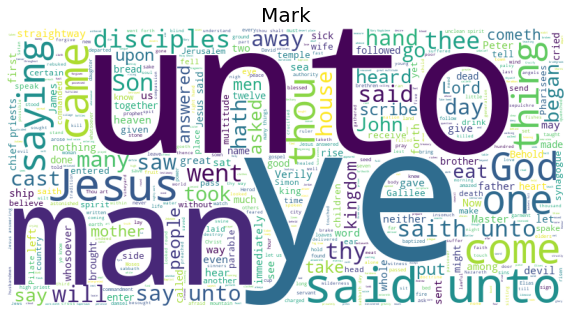

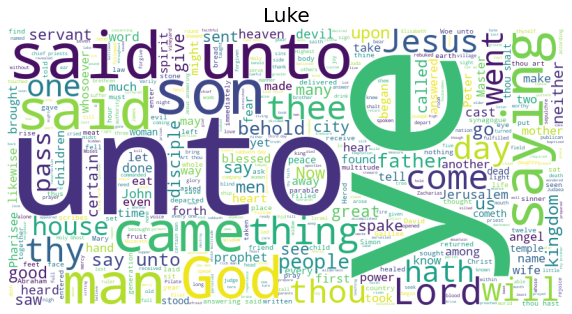

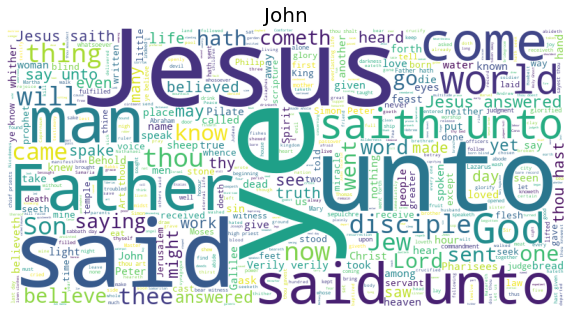

<Figure size 432x288 with 0 Axes>

In [11]:
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=5000, contour_width=3, contour_color='steelblue').generate(data)
    plt.figure(figsize=(10,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()   

# Apply word cloud generation and display
generate_wordcloud(matt['Text'].str.cat(sep=' '), 'Matthew')
generate_wordcloud(mark['Text'].str.cat(sep=' '), 'Mark')
generate_wordcloud(luke['Text'].str.cat(sep=' '), 'Luke')
generate_wordcloud(john['Text'].str.cat(sep=' '), 'John')
plt.tight_layout()
plt.show()


Top 10 Unigrams:
('said',): 853
('Jesus',): 619
('man',): 475
('came',): 342
('come',): 318
('God',): 315
('say',): 312
('thing',): 310
('saying',): 304
('day',): 254

Top 10 Bigrams:
('answered', 'said'): 101
('Son', 'man'): 85
('Jesus', 'said'): 75
('Jesus', 'answered'): 64
('chief', 'priest'): 55
('kingdom', 'God'): 55
('came', 'pas'): 50
('Jesus', 'saith'): 43
('Verily', 'say'): 39
('said', 'Lord'): 39

Top 10 Trigrams:
('Jesus', 'answered', 'said'): 36
('Verily', 'verily', 'say'): 25
('chief', 'priest', 'scribe'): 17
('Jesus', 'answering', 'said'): 14
('said', 'Verily', 'say'): 12
('might', 'fulfilled', 'spoken'): 9
('came', 'pas', 'Jesus'): 9
('cried', 'loud', 'voice'): 9
('ear', 'hear', 'let'): 8
('hear', 'let', 'hear'): 8


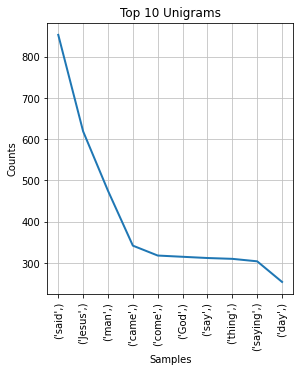

/var/folders/48/ydwg4hb14pv_yg2zv1ph__zw0000gn/T/ipykernel_2566/679132828.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132)


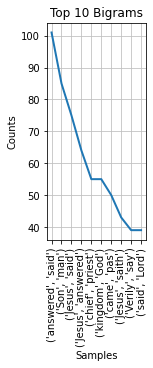

/var/folders/48/ydwg4hb14pv_yg2zv1ph__zw0000gn/T/ipykernel_2566/679132828.py:52: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(133)


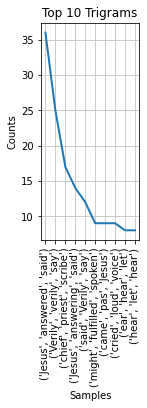

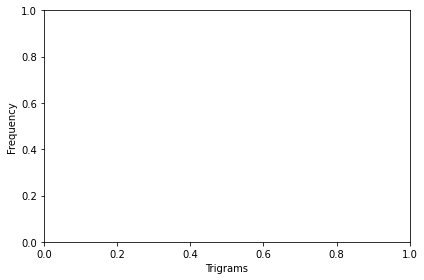

In [12]:
import nltk
from nltk import FreqDist
from nltk.util import ngrams

processed_text = data['Processed_Text']

# Tokenize the text into words
words = nltk.word_tokenize(" ".join(processed_text))

# Compute unigrams, bigrams, and trigrams
unigrams = list(ngrams(words, 1))
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Calculate frequencies for unigrams, bigrams, and trigrams
unigram_freq = FreqDist(unigrams)
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

# List the top N most common unigrams, bigrams, and trigrams
top_n = 10  # Change this to the desired number of top items
top_unigrams = unigram_freq.most_common(top_n)
top_bigrams = bigram_freq.most_common(top_n)
top_trigrams = trigram_freq.most_common(top_n)

# Print and visualize the results
print(f"Top {top_n} Unigrams:")
for item in top_unigrams:
    print(f"{item[0]}: {item[1]}")

print(f"\nTop {top_n} Bigrams:")
for item in top_bigrams:
    print(f"{item[0]}: {item[1]}")

print(f"\nTop {top_n} Trigrams:")
for item in top_trigrams:
    print(f"{item[0]}: {item[1]}")

# Create frequency distribution plots (histograms)
plt.figure(figsize=(15, 5))

plt.subplot(131)
unigram_freq.plot(top_n, title=f"Top {top_n} Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")

plt.subplot(132)
bigram_freq.plot(top_n, title=f"Top {top_n} Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")

plt.subplot(133)
trigram_freq.plot(top_n, title=f"Top {top_n} Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

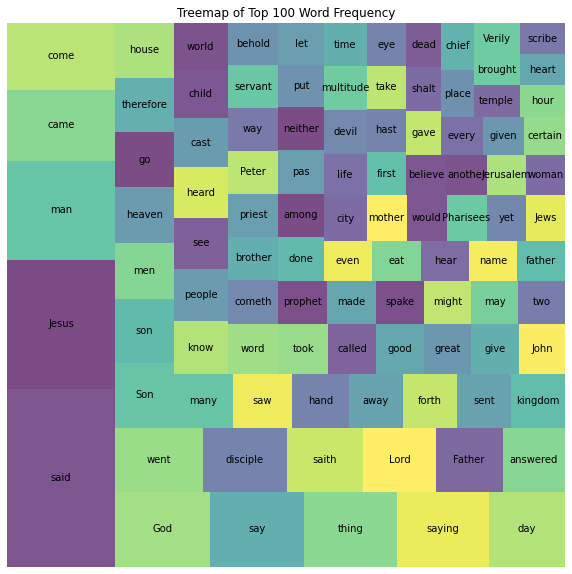

In [13]:
### Creating a word frequency tree map

def generate_word_frequency_treemap(dataframe, text_column, top_n=100):
    # Step 1: Count word frequency
    word_freq = {}
    for text in dataframe[text_column]:
        words = text.split()
        for word in words:
            word_freq[word] = word_freq.get(word, 0) + 1

    # Step 2: Sort and get the top N words
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Step 3: Create a DataFrame with the top N words and their frequencies
    word_data = pd.DataFrame(sorted_word_freq, columns=['Word', 'Frequency'])

    # Step 4: Create the treemap
    plt.figure(figsize=(10, 10))
    squarify.plot(sizes=word_data['Frequency'].values, label=word_data['Word'], alpha=0.7)
    plt.axis('off')
    plt.title(f'Treemap of Top {top_n} Word Frequency')
    plt.show()

generate_word_frequency_treemap(data,'Processed_Text', top_n=100)


In [14]:
##  Calculate the total number of unique words (vocabulary size) for each Gospel.


# Group the data by 'Book Name' and concatenate all text from the same book
gospels_grouped = data.groupby('Book Name')['Processed_Text'].apply(' '.join)

# Tokenize and find unique words for each Gospel
vocabulary_size = {}
for book_name, text in gospels_grouped.items():
    
    # Tokenize the text into words
    words = text.split()
    
    # Calculate the vocabulary size (number of unique words)
    unique_words = set(words)
    vocab_size = len(unique_words)
    
    # Store the result in the dictionary
    vocabulary_size[book_name] = vocab_size

# Convert the results to a DataFrame
vocab_size_df = pd.DataFrame(list(vocabulary_size.items()), columns=['Book Name', 'Vocabulary Size'])

# Print or return the DataFrame
print(vocab_size_df)

  Book Name  Vocabulary Size
0      John             1297
1      Luke             2210
2      Mark             1519
3   Matthew             1962


In [15]:
##  Identify and list words that are unique to each Gospel.


# Create a dictionary to store unique words for each Gospel
unique_words_per_gospel = {}

# Iterate through each Gospel's text
for book_name, text in gospels_grouped.items():
    
    # Tokenize the text into words
    words = text.split()
    
    # Create a set of unique words for this Gospel
    unique_words = set(words)
    
    # Remove words that appear in other Gospels
    for other_book, other_text in gospels_grouped.items():
        if other_book != book_name:
            other_words = set(other_text.split())
            unique_words -= other_words
    
    # Store the unique words in the dictionary
    unique_words_per_gospel[book_name] = unique_words

# Convert the results to a DataFrame
unique_words_df = pd.DataFrame(list(unique_words_per_gospel.items()), columns=['Book Name', 'Unique Words'])

# Print or return the DataFrame
print(unique_words_df)

  Book Name  \
0      John   
1      Luke   
2      Mark   
3   Matthew   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Unique Words  
0        

# Sentiment Analysis

In [16]:
### Using VADER sentiment tool 

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return "positive"
    elif sentiment_score['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

# Add a new column to the DataFrame with sentiment labels
data['VADER_Sentiment'] = data['Processed_Text'].apply(get_sentiment_label)
data.head()

,Book Name,Book Number,Chapter,Verse,Text,Processed_Text,Reference,Word_Count,VADER_Sentiment
Verse ID,,,,,,,,,
0,Matthew,1,1,1,"The book of the generation of Jesus Christ, the son of David, the son of Abraham.",book generation Jesus Christ son David son Abraham,Matthew 1:1,8,neutral
1,Matthew,1,1,2,Abraham begat Isaac; and Isaac begat Jacob; and Jacob begat Judas and his brethren;,Abraham begat Isaac Isaac begat Jacob Jacob begat Judas brother,Matthew 1:2,10,neutral
2,Matthew,1,1,3,And Judas begat Phares and Zara of Thamar; and Phares begat Esrom; and Esrom begat Aram;,Judas begat Phares Zara Thamar Phares begat Esrom Esrom begat Aram,Matthew 1:3,11,neutral
3,Matthew,1,1,4,And Aram begat Aminadab; and Aminadab begat Naasson; and Naasson begat Salmon;,Aram begat Aminadab Aminadab begat Naasson Naasson begat Salmon,Matthew 1:4,9,neutral
4,Matthew,1,1,5,And Salmon begat Booz of Rachab; and Booz begat Obed of Ruth; and Obed begat Jesse;,Salmon begat Booz Rachab Booz begat Obed Ruth Obed begat Jesse,Matthew 1:5,11,neutral


### Naive Bayes

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(data['Processed_Text']).toarray()
y=data['VADER_Sentiment']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_mnb:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.78
              precision    recall  f1-score   support

    negative       0.75      0.72      0.74       200
     neutral       0.82      0.79      0.80       319
    positive       0.75      0.81      0.77       237

    accuracy                           0.78       756
   macro avg       0.77      0.77      0.77       756
weighted avg       0.78      0.78      0.78       756



### Random Forest

In [18]:
!pip install scikit-learn==0.18.2 

from sklearn.ensemble import RandomForestClassifier

  Using cached scikit-learn-0.18.2.tar.gz (9.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [748 lines of output]
      /private/var/folders/48/ydwg4hb14pv_yg2zv1ph__zw0000gn/T/pip-install-1svqxtwq/scikit-learn_08c0e1c42f6b45d2b9fc483e3d1787bd/setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import parse_version
      Partial import of sklearn during the build process.
      /private/var/folders/48/ydwg4hb14pv_yg2zv1ph__zw0000gn/T/pip-install-1svqxtwq/scikit-learn_08c0e1c42f6b45d2b9fc483e3d1787bd/setup.py:262: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
      

Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [20]:
# Fitting Random Forest classifier with 100 trees to the Training set

rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rfc:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

    negative       0.94      0.72      0.81       200
     neutral       0.83      0.98      0.90       319
    positive       0.87      0.83      0.85       237

    accuracy                           0.86       756
   macro avg       0.88      0.84      0.85       756
weighted avg       0.87      0.86      0.86       756



### Decision Tree

In [21]:
# Fitting Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Evaluate the model
y_pred = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dtc:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

    negative       0.84      0.81      0.82       200
     neutral       0.91      0.92      0.91       319
    positive       0.84      0.86      0.85       237

    accuracy                           0.87       756
   macro avg       0.86      0.86      0.86       756
weighted avg       0.87      0.87      0.87       756



### XGBoost

In [22]:
! pip install xgboost
import xgboost as xgb

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [23]:
# Fitting XGBoost
xgb = xgb.XGBClassifier()
sentiment_mapping = {'positive': 2, 'negative': 1, 'neutral': 0}
y_train_xgb = y_train.map(sentiment_mapping)
y_test_xgb = y_test.map(sentiment_mapping)
xgb.fit(X_train, y_train_xgb)

# Evaluate the model
y_pred = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test_xgb, y_pred)
print(f"Accuracy: {accuracy_xgb:.2f}")
print(classification_report(y_test_xgb, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       319
           1       0.92      0.69      0.79       200
           2       0.88      0.81      0.84       237

    accuracy                           0.85       756
   macro avg       0.87      0.83      0.84       756
weighted avg       0.86      0.85      0.85       756



### Support Vector Machines

In [24]:
# Fitting SVM 
kernels = ['linear', 'rbf', 'poly'] # Create 3 types of SVM Kernels
best_accuracy = 0.0
best_kernel = None
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred_svm = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_svm)
    print(f"{kernel} kernel - Accuracy: {accuracy:.2f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print(f"Best kernel: {best_kernel}, Best accuracy: {best_accuracy:.2f}")

linear kernel - Accuracy: 0.87
rbf kernel - Accuracy: 0.78
poly kernel - Accuracy: 0.53
Best kernel: linear, Best accuracy: 0.87


In [25]:
best_accuracy = 0.0
best_kernel = None

models = {}
reports = {}

for kernel in kernels:
    # Create and fit the SVM model with the current kernel
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    y_pred_svm = clf.predict(X_test)
    models[kernel] = clf
    report = classification_report(y_test, y_pred_svm, output_dict=True)
    reports[kernel] = report
    
    print(f"Classification Report for {kernel} kernel:")
    print(classification_report(y_test, y_pred_svm))
    
    accuracy = accuracy_score(y_test, y_pred_svm)
    print(f"Accuracy for {kernel} kernel: {accuracy:.2f}\n")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print(f"Best kernel: {best_kernel}, Best accuracy: {best_accuracy:.2f}")

Classification Report for linear kernel:
              precision    recall  f1-score   support

    negative       0.83      0.79      0.81       200
     neutral       0.86      0.94      0.90       319
    positive       0.90      0.83      0.86       237

    accuracy                           0.87       756
   macro avg       0.87      0.85      0.86       756
weighted avg       0.87      0.87      0.87       756

Accuracy for linear kernel: 0.87

Classification Report for rbf kernel:
              precision    recall  f1-score   support

    negative       0.91      0.56      0.69       200
     neutral       0.73      0.95      0.83       319
    positive       0.80      0.75      0.77       237

    accuracy                           0.78       756
   macro avg       0.81      0.75      0.76       756
weighted avg       0.80      0.78      0.77       756

Accuracy for rbf kernel: 0.78

Classification Report for poly kernel:
              precision    recall  f1-score   support



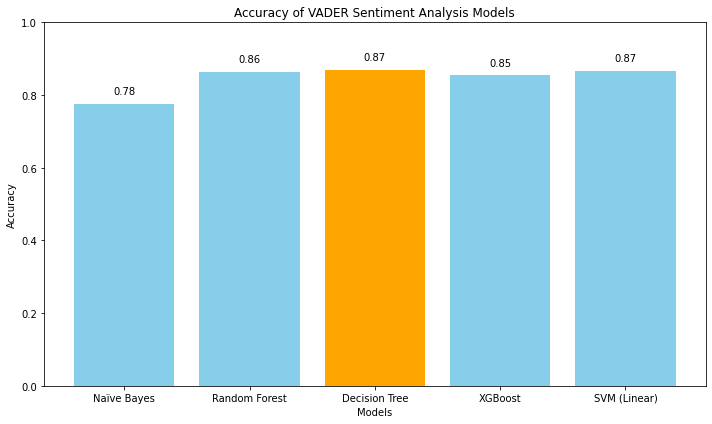

In [26]:
# model names and their corresponding accuracies
model_names = ['Naïve Bayes', 'Random Forest', 'Decision Tree', 'XGBoost', 'SVM (Linear)']
accuracies = [accuracy_mnb, accuracy_rfc, accuracy_dtc, accuracy_xgb, best_accuracy]

max_index = accuracies.index(max(accuracies))
colours = ['orange' if i == max_index else 'skyblue' for i in range(len(model_names))]

# Bar plot of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=colours)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of VADER Sentiment Analysis Models')
plt.ylim(0, 1) 


# Add accuracy values as text above the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


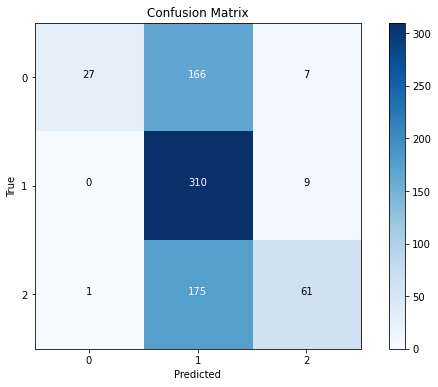

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = [0, 1, 2]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.show()

In [ ]:
data.head()

### Deep learning model

### LSTM

In [29]:
tf.config.run_functions_eagerly(True)

In [30]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
unique_labels = np.unique(y_train)
label_map = {label: i for i, label in enumerate(unique_labels)}
y_train_int = np.array([label_map[label] for label in y_train])

num_classes = len(unique_labels)
y_train_one_hot = to_categorical(y_train_int, num_classes)

unique_labels = np.unique(y_test)
label_map = {label: i for i, label in enumerate(unique_labels)}
y_test_int = np.array([label_map[label] for label in y_test])

num_classes = len(unique_labels)
y_test_one_hot = to_categorical(y_test_int, num_classes)

model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.MaxPooling1D(2))

# Second Convolutional Layer
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Third Convolutional Layer
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Flatten the output to prepare for fully connected layers
model.add(layers.Flatten())

# First Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer for multi-class classification
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer= optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, validation_data=(X_test,y_test_one_hot),verbose = 1,callbacks=[early_stopping])


AttributeError: 'dict' object has no attribute 'Sequential'

In [32]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

NameError: name 'model' is not defined

In [34]:

from sklearn.metrics import confusion_matrix
epochs = model_history.epoch
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

# Plot training and validation accuracy over epochs

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# Plot training and validation loss over epochs

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))

# Calculate the confusion matrix based on actual vs. predicted labels
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))

NameError: name 'model_history' is not defined

In [35]:
!pip install imbalanced-learn
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


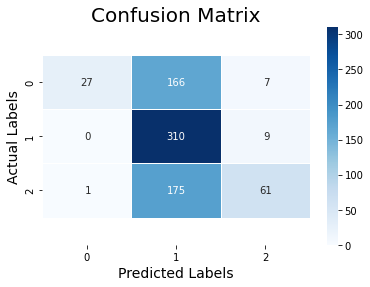

NameError: name 'actual' is not defined

In [36]:
import seaborn as sns
conf_matrix= pd.DataFrame(cm,columns=None)
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='2g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

s=specificity_score(actual,predictions,average='macro')
print('Specificity Score:',s)

y_score=model.predict(X_test)
auc=roc_auc_score(y_test, y_score, average='macro',multi_class='ovo')
print('AUC ROC:',auc)

p=precision_score(actual,predictions,average='macro')
r=recall_score(actual,predictions,average='macro')
f=f1_score(actual,predictions,average='macro')
print('precision_score',p,'recall_score',r,'f1_score',f)

In [37]:
## Add LSTM predictions column

predictions = model.predict(X)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
data['LSTM_Sentiment']=predictions

NameError: name 'model' is not defined

In [ ]:
data.head()

In [38]:
differing_sentiments = data[data['LSTM_Sentiment'] != data['VADER_Sentiment']]

# Display the rows where sentiments differ
print(differing_sentiments[['Reference', 'Text', 'VADER_Sentiment', 'LSTM_Sentiment']])

KeyError: 'LSTM_Sentiment'

### BERT 

In [39]:
!pip install transformers
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [40]:
def sentiment_score_weight(sentiment):
    label = sentiment['label']
    score = float(sentiment['score'])
    label_value = 1 if label == 'POSITIVE' else -1
    weighted_score = label_value*score
    return weighted_score

sentiment_pipeline = pipeline("sentiment-analysis", model='bert-large-uncased')
text = list(data['Text'])
sentiment_output = sentiment_pipeline(text)
data['BERT_Sentiment'] = sentiment_output
data['BERT_weighted_score'] = data['BERT_Sentiment'].apply(lambda x: sentiment_score_weight(sentiment=x))
#data.head()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 

In [41]:
import seaborn as sns

data_chapters = data[['Book Name', 'Chapter', 'BERT_weighted_score']].groupby(['Book Name','Chapter']).mean()
#data_chapters = data_chapters.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(ax=ax, data=data_chapters, hue='Book Name', linewidth=3, x='Chapter', y='BERT_weighted_score')
plt.xlabel("Chapter #")
plt.ylabel("Avg. Sentiment")
plt.title("Average Sentiment of gospels by Chapter\n")
plt.show(fig)

KeyError: "['BERT_weighted_score'] not in index"

In [45]:
matt.head()

,Book Name,Book Number,Chapter,Verse,Text,Processed_Text,Reference
Verse ID,,,,,,,
0,Matthew,1,1,1,"The book of the generation of Jesus Christ, the son of David, the son of Abraham.",book generation Jesus Christ son David son Abraham,Matthew 1:1
1,Matthew,1,1,2,Abraham begat Isaac; and Isaac begat Jacob; and Jacob begat Judas and his brethren;,Abraham begat Isaac Isaac begat Jacob Jacob begat Judas brother,Matthew 1:2
2,Matthew,1,1,3,And Judas begat Phares and Zara of Thamar; and Phares begat Esrom; and Esrom begat Aram;,Judas begat Phares Zara Thamar Phares begat Esrom Esrom begat Aram,Matthew 1:3
3,Matthew,1,1,4,And Aram begat Aminadab; and Aminadab begat Naasson; and Naasson begat Salmon;,Aram begat Aminadab Aminadab begat Naasson Naasson begat Salmon,Matthew 1:4
4,Matthew,1,1,5,And Salmon begat Booz of Rachab; and Booz begat Obed of Ruth; and Obed begat Jesse;,Salmon begat Booz Rachab Booz begat Obed Ruth Obed begat Jesse,Matthew 1:5


### Similarity between chapters

In [46]:
#Seperate the dataframe into 4 books

matt=data[data['Book Name'] == 'Matthew']
mark=data[data['Book Name'] == 'Mark']
luke=data[data['Book Name'] == 'Luke']
john=data[data['Book Name'] == 'John']

0.5


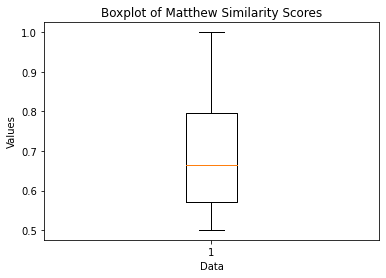

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt


def boxplot(data, book):
    # Create a boxplot
    plt.figure(figsize=(6, 4))  
    plt.boxplot(data)

    # Add labels and title
    plt.xlabel("Data")
    plt.ylabel("Values")
    plt.title(f"Boxplot of {book} Similarity Scores")

    # Display the plot
    plt.show()


def find_most_similar_text(query, text_dataset):
    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the texts
    tfidf_matrix = vectorizer.fit_transform([query] + text_dataset)

    # Calculate cosine similarities
    cosine_similarities = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1:])[0]

    # Find the index of the most similar text
    most_similar_index = cosine_similarities.argmax()
    similarity_score = cosine_similarities[most_similar_index]
    if similarity_score >= threshold:
        scores.append(similarity_score)
        return most_similar_index, similarity_score
    return None, None


threshold = float(input())
scores = []
text_dataset2 = list(mark.Processed_Text)
text_dataset3 = list(luke.Processed_Text)
text_dataset4 = list(john.Processed_Text)
M = pd.DataFrame()
queries = [
    text for text in matt.Processed_Text
]  # Select text line by line from Matthew and compare with the other 3
for query in range(len(queries)):
    index2, ss2 = find_most_similar_text(queries[query], text_dataset2)
    index3, ss3 = find_most_similar_text(queries[query], text_dataset3)
    index4, ss4 = find_most_similar_text(queries[query], text_dataset4)
    if index2 == None or index3 == None or index4 == None:
        continue
    row = {
        "Query from Matthew": matt.Text[query],
        "Query sentiment": matt.VADER_Sentiment[query],
        "Most similar text Mark": mark.Text[len(matt) + index2],
        "Mark sentiment": list(mark.VADER_Sentiment)[index2],
        "Mark Similarity Score": ss2,
        "Most similar text Luke": luke.Text[len(matt) + len(mark) + index3],
        "Luke sentiment": list(luke.VADER_Sentiment)[index3],
        "Luke Similarity Score": ss3,
        "Most similar text John": john.Text[len(matt) + len(mark) + len(luke) + index4],
        "John sentiment": list(john.VADER_Sentiment)[index4],
        "John Similarity Score": ss4,
    }
    row = pd.DataFrame(row, index=[0])
    M = pd.concat([M, row], ignore_index=True)
boxplot(scores, 'Matthew')

0.5


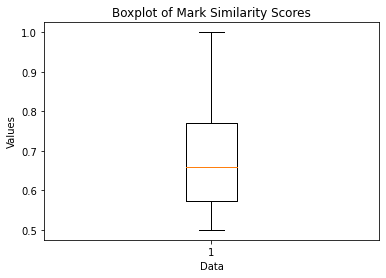

In [48]:

text_dataset2 = list(matt.Processed_Text)
text_dataset3 = list(luke.Processed_Text)
text_dataset4 = list(john.Processed_Text)
threshold = float(input())
scores = []
Mk = pd.DataFrame()
queries = [
    text for text in mark.Processed_Text
]  # Select text line by line from Mark and compare with the other 3
for query in range(len(queries)):
    index2, ss2 = find_most_similar_text(queries[query], text_dataset2)
    index3, ss3 = find_most_similar_text(queries[query], text_dataset3)
    index4, ss4 = find_most_similar_text(queries[query], text_dataset4)
    if index2 == None or index3 == None or index4 == None:
        continue
    row = {
        "Query from Mark": mark.Text[len(matt) + query],
        "Query sentiment": mark.VADER_Sentiment[len(matt) + query],
        "Most similar text Matthew": matt.Text[index2],
        "Matthew sentiment": list(matt.VADER_Sentiment)[index2],
        "Matthew Similarity Score": ss2,
        "Most similar text Luke": luke.Text[len(matt) + len(mark) + index3],
        "Luke sentiment": list(luke.VADER_Sentiment)[index3],
        "Luke Similarity Score": ss3,
        "Most similar text John": john.Text[len(matt) + len(mark) + len(luke) + index4],
        "John sentiment": list(john.VADER_Sentiment)[index4],
        "John Similarity Score": ss4,
    }
    row = pd.DataFrame(row, index=[0])
    Mk = pd.concat([Mk, row], ignore_index=True)
boxplot(scores, 'Mark')

0.5


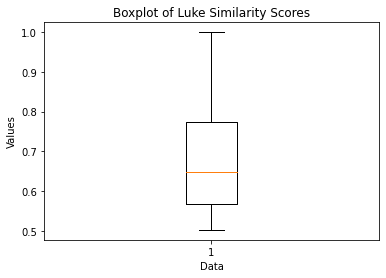

In [49]:
text_dataset2 = list(matt.Processed_Text)
text_dataset3 = list(mark.Processed_Text)
text_dataset4 = list(john.Processed_Text)
threshold = float(input())
scores = []
L = pd.DataFrame()
queries = [
    text for text in luke.Processed_Text
]  # Select text line by line from Luke and compare with the other 3
for query in range(len(queries)):
    index2, ss2 = find_most_similar_text(queries[query], text_dataset2)
    index3, ss3 = find_most_similar_text(queries[query], text_dataset3)
    index4, ss4 = find_most_similar_text(queries[query], text_dataset4)
    if index2 == None or index3 == None or index4 == None:
        continue
    row = {
        "Query from Luke": luke.Text[len(matt) + len(mark) + query],
        "Query sentiment": luke.VADER_Sentiment[len(matt) + len(mark) + query],
        "Most similar text Matthew": matt.Text[index2],
        "Matthew sentiment": list(matt.VADER_Sentiment)[index2],
        "Matthew Similarity Score": ss2,
        "Most similar text Mark": mark.Text[len(matt) + index3],
        "Mark sentiment": list(mark.VADER_Sentiment)[index3],
        "Mark Similarity Score": ss3,
        "Most similar text John": john.Text[len(matt) + len(mark) + len(luke) + index4],
        "John sentiment": list(john.VADER_Sentiment)[index4],
        "John Similarity Score": ss4,
    }
    row = pd.DataFrame(row, index=[0])
    L = pd.concat([L, row], ignore_index=True)
boxplot(scores, 'Luke')

0.5


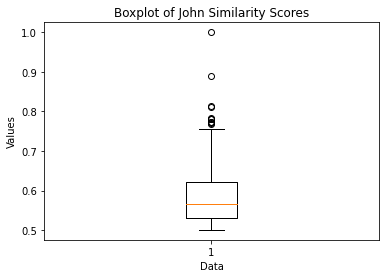

In [50]:
text_dataset2 = list(matt.Processed_Text)
text_dataset3 = list(mark.Processed_Text)
text_dataset4 = list(luke.Processed_Text)
threshold = float(input())
scores = []
J = pd.DataFrame()
queries = [
    text for text in john.Processed_Text
]  # Select text line by line from John and compare with the other 3
for query in range(len(queries)):
    index2, ss2 = find_most_similar_text(queries[query], text_dataset2)
    index3, ss3 = find_most_similar_text(queries[query], text_dataset3)
    index4, ss4 = find_most_similar_text(queries[query], text_dataset4)
    if index2 == None or index3 == None or index4 == None:
        continue
    row = {
        "Query from John": john.Text[len(matt) + len(mark) + len(luke) + query],
        "Query sentiment": john.VADER_Sentiment[len(matt) + len(mark) + len(luke) + query],
        "Most similar text Matthew": matt.Text[index2],
        "Matthew sentiment": list(matt.VADER_Sentiment)[index2],
        "Matthew Similarity Score": ss2,
        "Most similar text Mark": mark.Text[len(matt) + index3],
        "Mark sentiment": list(mark.VADER_Sentiment)[index3],
        "Mark Similarity Score": ss3,
        "Most similar text Luke": luke.Text[len(matt) + len(mark) + index4],
        "John sentiment": list(luke.VADER_Sentiment)[index4],
        "Luke Similarity Score": ss4,
    }
    row = pd.DataFrame(row, index=[0])
    J = pd.concat([J, row], ignore_index=True)
boxplot(scores, 'John')

In [51]:
def average(data,column1,column2,column3):
  # List of columns to calculate the average for
  columns_to_average = [column1,column2,column3]

  # Calculate the row-wise average and store it in a new column "Average"
  data['Average Similarity'] = data[columns_to_average].mean(axis=1)

  # Display the DataFrame with the new "Average" column
  return data

In [52]:
M = average(M,'Mark Similarity Score','Luke Similarity Score','John Similarity Score').sort_values(by='Average Similarity', ascending=False).head(100)
Mk = average(Mk,'Matthew Similarity Score','Luke Similarity Score','John Similarity Score').sort_values(by='Average Similarity', ascending=False).head(100)
L = average(L,'Mark Similarity Score','Matthew Similarity Score','John Similarity Score').sort_values(by='Average Similarity', ascending=False).head(100)
J = average(J,'Mark Similarity Score','Luke Similarity Score','Matthew Similarity Score').sort_values(by='Average Similarity', ascending=False).head(100)


In [53]:
M.head()

,Query from Matthew,Query sentiment,Most similar text Mark,Mark sentiment,Mark Similarity Score,Most similar text Luke,Luke sentiment,Luke Similarity Score,Most similar text John,John sentiment,John Similarity Score,Average Similarity
8,"‹Heaven and earth shall pass away, but my words shall not pass away.›",positive,‹Heaven and earth shall pass away: but my words shall not pass away.›,positive,1.000000,‹Heaven and earth shall pass away: but my words shall not pass away.›,positive,1.000000,"‹And now I have told you before it come to pass, that, when it is come to pass, ye might believe.›",neutral,0.535890,0.845297
0,"For this is he that was spoken of by the prophet Esaias, saying, The voice of one crying in the wilderness, Prepare ye the way of the Lord, make his paths straight.",negative,"The voice of one crying in the wilderness, Prepare ye the way of the Lord, make his paths straight.",negative,0.842518,"As it is written in the book of the words of Esaias the prophet, saying, The voice of one crying in the wilderness, Prepare ye the way of the Lord, make his paths straight.",negative,0.857219,"He said, I [am] the voice of one crying in the wilderness, Make straight the way of the Lord, as said the prophet Esaias.",negative,0.795174,0.831637
2,All these things spake Jesus unto the multitude in parables; and without a parable spake he not unto them:,neutral,"But without a parable spake he not unto them: and when they were alone, he expounded all things to his disciples.",positive,0.625991,"And he spake this parable unto them, saying,",neutral,0.747811,This parable spake Jesus unto them: but they understood not what things they were which he spake unto them.,neutral,0.740511,0.704771
1,"‹He that receiveth you receiveth me, and he that receiveth me receiveth him that sent me.›",neutral,"‹Whosoever shall receive one of such children in my name, receiveth me: and whosoever shall receive me, receiveth not me, but him that sent me.›",neutral,0.649287,"And said unto them, ‹Whosoever shall receive this child in my name receiveth me: and whosoever shall receive me receiveth him that sent me: for he that is least among you all, the same shall be great.›",positive,0.583168,"‹Verily, verily, I say unto you, He that receiveth whomsoever I send receiveth me; and he that receiveth me receiveth him that sent me.›",neutral,0.874540,0.702331
4,"And they did all eat, and were filled: and they took up of the fragments that remained twelve baskets full.",neutral,"And they took up twelve baskets full of the fragments, and of the fishes.",neutral,0.682479,"And they did eat, and were all filled: and there was taken up of fragments that remained to them twelve baskets.",neutral,0.842108,"Therefore they gathered [them] together, and filled twelve baskets with the fragments of the five barley loaves, which remained over and above unto them that had eaten.",neutral,0.554807,0.693131


# Topic Modelling

In [54]:
### Reading topic file

topics = pd.read_excel("//Users/rhodadurodola/Desktop/Project/Data/topics.xlsx", index_col=0)
print(topics.head())

              Topic  \
Topic ID              
0          Adultery   
1             Anger   
2           Anxiety   
3         Authority   
4           Baptism   

                                                                                Associated Words  
Topic ID                                                                                          
0         Infidelity Lust Marriage Sin Covenant Faithfulness Commit Unfaithful Sexual Immorality  
1                                                      Wrath Patience Control Burn Slow to anger  
2                                                                      Worry Peace Trust Despair  
3                            Authorities Sumbit Leadership Power Obedience Priest Sovereign Rule  
4                         Born Again Cleansing Repentance Immersion John the Baptist Holy spirit  


In [55]:
!pip install gensim
from gensim import corpora
from gensim import models

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [58]:
#Preprocess the 'Associated Words'
nltk.download("punkt")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

theme_keywords = {}
for _, row in topics.iterrows():
    topic = row["Topic"]
    associated_words = row["Associated Words"]

    # Tokenize and preprocess the associated words
    tokens = word_tokenize(associated_words.lower())
    keywords = [word for word in tokens if word not in stop_words and word.isalnum()]

    theme_keywords[topic] = keywords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rhodadurodola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rhodadurodola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# Train an LDA model using the preprocessed text data and theme keywords

dictionary = corpora.Dictionary(data["Processed_Text"])
corpus = [dictionary.doc2bow(tokens) for tokens in data["Processed_Text"]]

# Initialize an LDA model
num_topics = len(theme_keywords)  # Number of topics based on Excel sheet
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20)

Theme = []
# Classify the text dataset into themes
for i, row in data.iterrows():
    text_bow = dictionary.doc2bow(row["Processed_Text"])
    topic_distribution = lda_model[text_bow]
    if topic_distribution == []:
        print(f"Text {data_original[i:i+1]} has No Dominant Theme")
        theme = "None"
        Theme.append(theme)
        continue
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]

    # Get the theme based on the dominant topic
    theme = list(theme_keywords.keys())[dominant_topic]

    print(f"Text {data[i:i+1]} belongs to theme: {theme}")
    Theme.append(theme)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [62]:
data['Theme'] = Theme
#data.head()

NameError: name 'Theme' is not defined

In [63]:
plt.figure(figsize=(20, 5))
sns.countplot(data=data_original, x='Theme')
plt.title('Count of Each Theme')
plt.xlabel('Theme')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

from wordcloud import WordCloud

theme_text = ' '.join(data_original['Theme'])
wordcloud = WordCloud(width=800, height=400, colormap='plasma', background_color='white').generate(theme_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Themes')
plt.show()

NameError: name 'data_original' is not defined

<Figure size 1440x360 with 0 Axes>

In [64]:
# Create a categorical chart book-wise
book_wise_counts = data_original.groupby(['Book Name', 'Theme']).size().unstack(fill_value=0)
book_wise_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Book-wise Theme Distribution')
plt.xlabel('Book')
plt.ylabel('Count')

plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

NameError: name 'data_original' is not defined

In [65]:
# Group the data by 'Book Name' and 'Theme' and count the occurrences
theme_counts = data_original.groupby(['Book Name', 'Theme']).size().reset_index(name='Count')

# Sort the data within each group by count in descending order
theme_counts['Rank'] = theme_counts.groupby('Book Name')['Count'].rank(method='first', ascending=False)

# Filter for the top 5 topics in each book
top5_topics_per_book = theme_counts[theme_counts['Rank'] <= 5]

# Display the top 5 topics for each book
for book_name, group in top5_topics_per_book.groupby('Book Name'):
    print(f"Top 5 Topics in '{book_name}':")
    for index, row in group.iterrows():
        print(f"  {row['Theme']}: {row['Count']} counts")
    print("\n")

NameError: name 'data_original' is not defined